In [1]:
import spacy

In [2]:
# Create a language object
# for korean you can use (ko)
# for arab you can use (ar)

nlp = spacy.blank("ar")

If you want to use another language you can see other options here: https://spacy.io/usage/models/

We will use arabic and take example from the Coran

In [3]:
# You can use type(nlp) to see the language you are using
type(nlp)

spacy.lang.ar.Arabic

In [4]:
# Creating a doc and providing the text
doc = nlp("بِسْمِ ٱللَّهِ ٱلرَّحْمَٰنِ ٱلرَّحِيمِ")

In [5]:
#Let's try word tokenization

for token in doc:
    print(token)

بِسْمِ
ٱللَّهِ
ٱلرَّحْمَٰنِ
ٱلرَّحِيمِ


In [6]:
# Let's try another one more difficult
doc2 = nlp('الٓمٓ . تِلْكَ ءَايَٰتُ ٱلْكِتَٰبِ ٱلْحَكِيمِ')
for token in doc2:
    print(token)

الٓمٓ
.
تِلْكَ
ءَايَٰتُ
ٱلْكِتَٰبِ
ٱلْحَكِيمِ


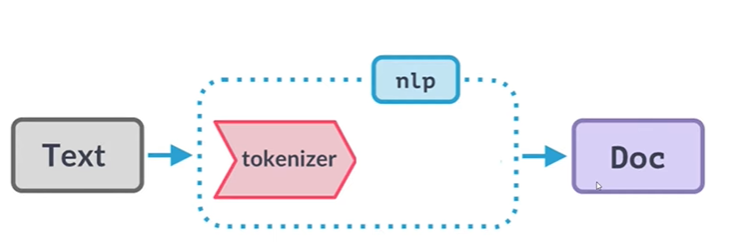

So we have tokenizer by default here, we don't need to create one, we just feed the text.

Easy application to build your NLP application : https://www.firstlanguage.in/

In [7]:
# You can use indexing to find a specific word, same as list in Python
doc2[-1]

ٱلْحَكِيمِ

In [8]:
doc2[0:6]

الٓمٓ . تِلْكَ ءَايَٰتُ ٱلْكِتَٰبِ ٱلْحَكِيمِ

# How does word tokenization work?

First it's split by prefix

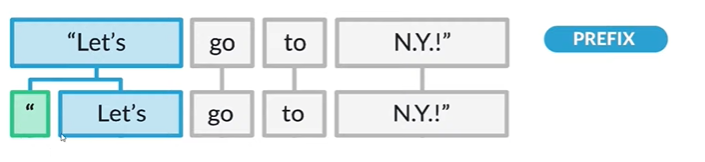

Then it's looks to exception like ; $ ( "

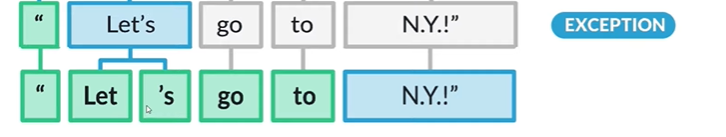

Then suffix like ; kg !

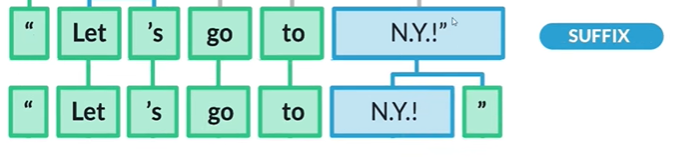

Finally again exception and we are done

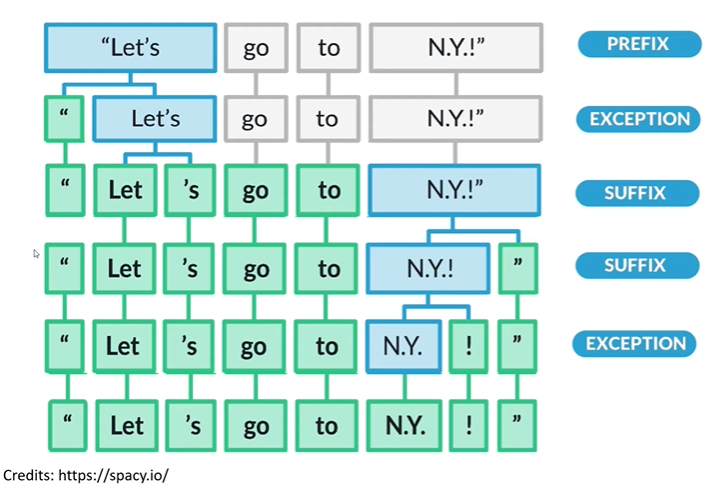

# Token attributes

In [9]:
doc = nlp("بِسْمِ ٱللَّهِ ٱلرَّحْمَٰنِ ٱلرَّحِيمِ")
token0 = doc[0]
token0

#Let's explore this token attributes

بِسْمِ

In [10]:
dir(token0)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 'ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_dep',
 'has_extension',
 'has_head',
 'has_morph',
 'has_vector',
 'head',
 'i',
 'idx',
 'iob_strings',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_end',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'le

We can see now all the attributes like "is_lower" , 'is_currency' ... 

In [11]:
# let's try those attributes

In [12]:
token0.is_currency

False

In [13]:
token0.is_digit

False

We can create a loop and explore every token in the doc

In [14]:
for token in doc:
    print(token, "=>",
         "is_currency:",token.is_currency,
         "is_digit:",token.is_digit
         )
# It's great for text analysis

بِسْمِ => is_currency: False is_digit: False
ٱللَّهِ => is_currency: False is_digit: False
ٱلرَّحْمَٰنِ => is_currency: False is_digit: False
ٱلرَّحِيمِ => is_currency: False is_digit: False


## Let's have an example

We will have a doc containing email and we want to extract thoses email from the doc

In [15]:
# let's open this doc
with open("nlp example.txt") as f:
    text = f.readlines() # Separate everything by a line
text

['Student ID       Email     \n',
 '\n',
 'Soula asma      soulaasma@gmail.com\n',
 'Soula walid\t soulawalid@gmail.com\n',
 'Soula lina\t soulalina@gmail.com']

In [16]:
# Group everything in on array

In [17]:
text = ''.join(text)
text

'Student ID       Email     \n\nSoula asma      soulaasma@gmail.com\nSoula walid\t soulawalid@gmail.com\nSoula lina\t soulalina@gmail.com'

In [18]:
#Let's grab thoses emails

doc3=nlp(text)
emails = []
for token in doc3:
    if token.like_email:
        emails.append(token.text)
emails

['soulaasma@gmail.com', 'soulawalid@gmail.com', 'soulalina@gmail.com']

# Custom Rules

In [19]:
nlp = spacy.blank("en")
doc = nlp('gimme double cheese burger !')

In [20]:
tokens = [token.text  for token in doc]
tokens

#For loop to extract every token in the doc

['gimme', 'double', 'cheese', 'burger', '!']

gimme is actually give me, so we need to create a custom rule for that

In [21]:
from spacy.symbols import ORTH

In [22]:
# Changing gimme to give me
# But we can't do that, because we can't modify the text
# So we will do "gim" and "me"

nlp.tokenizer.add_special_case("gimme",[
    {ORTH: "gim"},
    {ORTH: "me" }
])

doc = nlp('gimme double cheese burger !')
tokens = [token.text  for token in doc]
tokens

['gim', 'me', 'double', 'cheese', 'burger', '!']

# Sentence Tokenization

In [27]:
nlp = spacy.blank("en")
doc = nlp('Mohamed (saws) is dead. But Allah is alive and will never die')

In [30]:
for sentence in doc.sents:
    print(sentence)

ValueError: [E030] Sentence boundaries unset. You can add the 'sentencizer' component to the pipeline with: `nlp.add_pipe('sentencizer')`. Alternatively, add the dependency parser or sentence recognizer, or set sentence boundaries by setting `doc[i].is_sent_start`.

We had an empty pipeline so we added to our original pipeline senticencer to do the task

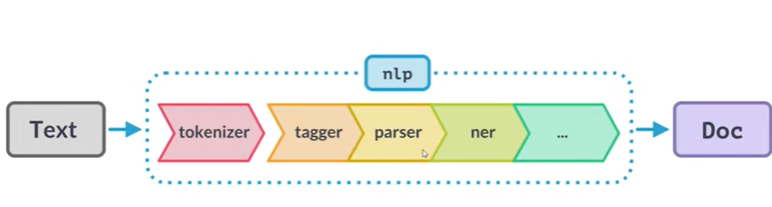

In [ ]:
nlp.add_pipe('sentencizer')
nlp.pipe_names

In [36]:
doc2 = nlp('Mohamed (saws) is dead. But Allah is alive and will never die')

for sentence in doc2.sents:
    print(sentence)

Mohamed (saws) is dead.
But Allah is alive and will never die


That's it !